Goal
===

Build a predictive model that is able to predict the average mood of the user on the next day based on the data we obtained from the user on the days before.

Exploration
===

In [95]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,5]

In [96]:
dateparse=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
df=pd.read_csv('dataset_mood_smartphone.csv', 
               header=1, 
               names=['uid','patient','time','variable','value'], 
               parse_dates=['time'], 
               date_parser=dateparse)

In [97]:
df.sample(10)

,uid,patient,time,variable,value
186139,1361601,AS14.24,2014-04-22 15:35:42.630,appCat.builtin,2.438000
150513,160897,AS14.02,2014-03-20 02:46:06.065,appCat.builtin,1.551000
92771,92773,AS14.19,2014-05-02 12:51:06.892,screen,10.383000
87703,87705,AS14.17,2014-04-13 13:29:34.075,screen,322.525000
128663,128665,AS14.31,2014-04-17 18:46:41.438,screen,2.085000
24419,24421,AS14.09,2014-04-21 09:00:00.000,activity,0.000000
362430,1792657,AS14.26,2014-05-13 12:52:16.946,appCat.social,8.063000
17368,17370,AS14.01,2014-04-09 14:00:00.000,activity,0.408333
108577,108579,AS14.26,2014-04-24 22:27:14.766,screen,487.481000
304189,441663,AS14.30,2014-05-03 09:57:47.398,appCat.communication,48.247000


In [98]:
# how many patients?
df.patient.unique().size

27

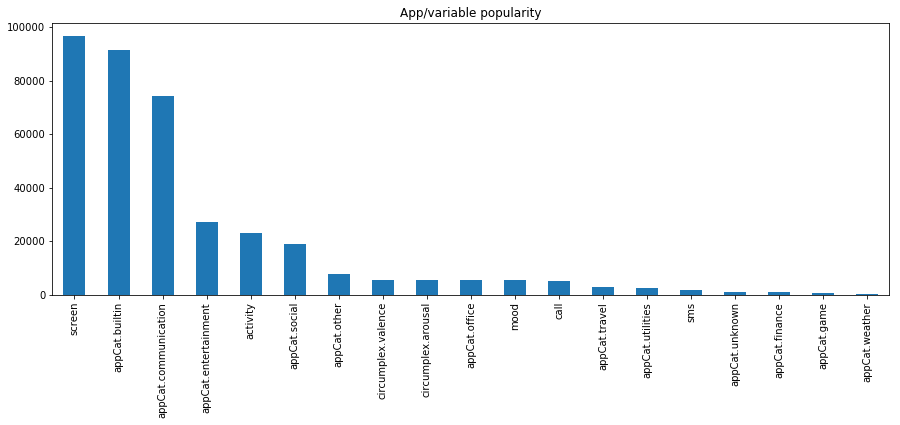

In [99]:
# which are the popular variables?
pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None,title='App/variable popularity');

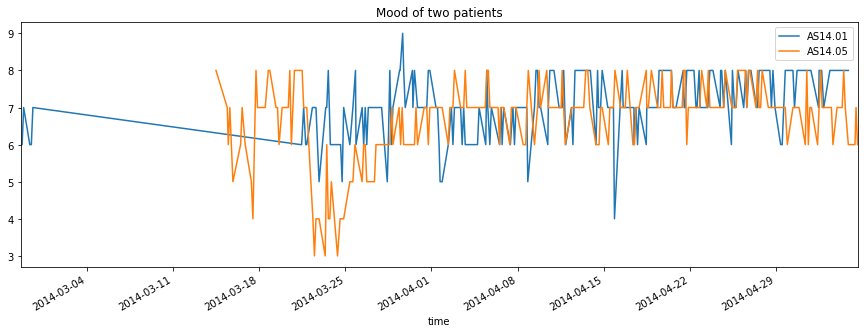

In [100]:
#look at a couple of patients' mood over time
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.01','AS14.05'])) & (df.variable=='mood')].groupby(['patient']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key,title='Mood of two patients')
plt.show()

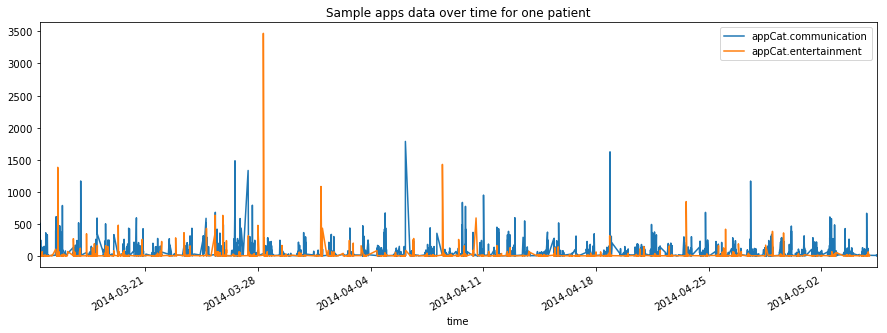

In [101]:
# look at the usage of a couple of apps of that patient with the dropped mood
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.05'])) & (df.variable.isin(['appCat.entertainment','appCat.communication']))].groupby(['variable']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key, title='Sample apps data over time for one patient')
plt.show()

Task 1: Pre-process the dataset
===

In [102]:
# calculate moving average as described in task1
preprod=df.pivot_table(index=[df.patient, df.time], columns='variable', values='value')\
        .unstack(level=[0])\
        .resample("1d").mean()\
        .rolling(window=5, min_periods=1).mean()\
        .stack(level=[1])\
        .swaplevel(1,0)

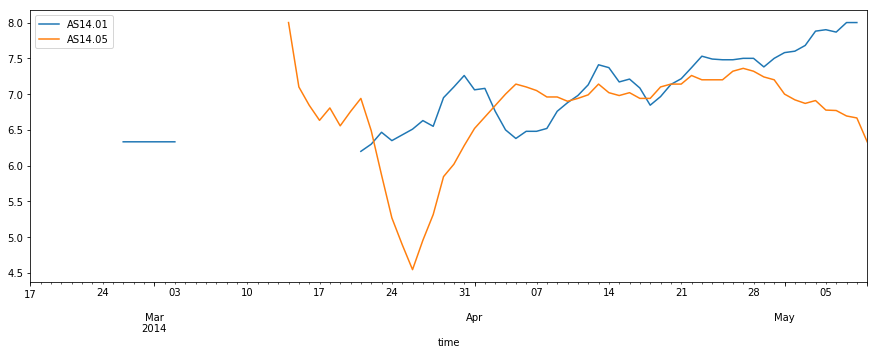

In [103]:
#look again at a couple of patients' mood over time
for patient in ('AS14.01','AS14.05'):
    preprod.loc[patient]['mood'].plot(label=patient, title='Mood of two patients (moving average)')
plt.legend();

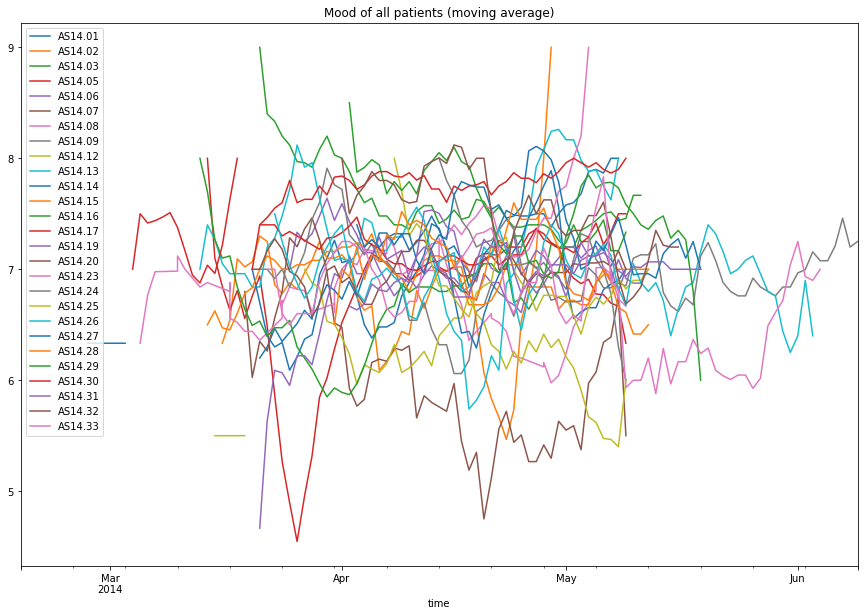

In [105]:
#look at all patients' mood over time
plt.rcParams["figure.figsize"] = [15,10]
for patient in preprod.index.levels[0]:
    preprod.loc[patient]['mood'].plot(label=patient, title='Mood of all patients (moving average)')
plt.legend();